In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.23.5'

## Generate rewards with Normal Gaussian Distribution

the true reward corresponding to each action is sampled from a normal distribution with mean = 0 and variance = 1

[ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
  0.1278404  -0.31624259 -0.01680116 -0.85304393]


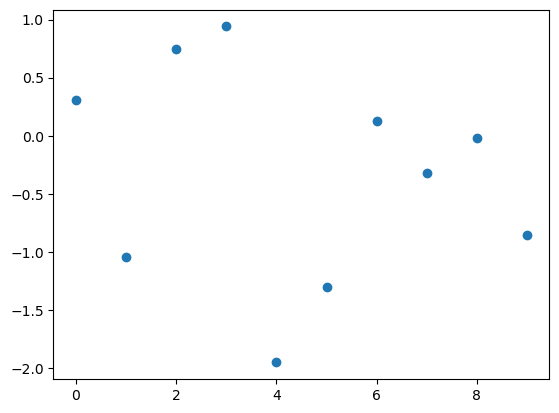

In [2]:
## random number generator
rng = np.random.default_rng(seed=42)


mu = 0
sigma = 1
# the shape of k-armed bandits, k=10
shape_ = (10)
action_indices = np.arange(0,shape_)
true_rewards = rng.normal(mu,sigma,shape_)

# show output and visualizing
print(true_rewards)
plt.plot(action_indices, true_rewards, 'o')
plt.show()


## k-Armed testbed visualization with k=10

An example bandit problem from the 10-armed testbed. The true value $q_{\star}(a)$ of each of the ten actions are selected according to a normal distribution with mean zero and unit variance one, and then actual rewards are selected according to a mean $q_{\star}(a)$ unit variance normal distribution.

In [3]:
%time
rng = np.random.default_rng(seed=42)
num_random = 2000
# normal distribution with mean = true_reward, variance = 1 and shape = 1000
runtime_rewards = np.array([rng.normal(true_reward,1,num_random) for true_reward in true_rewards])

CPU times: total: 0 ns
Wall time: 0 ns


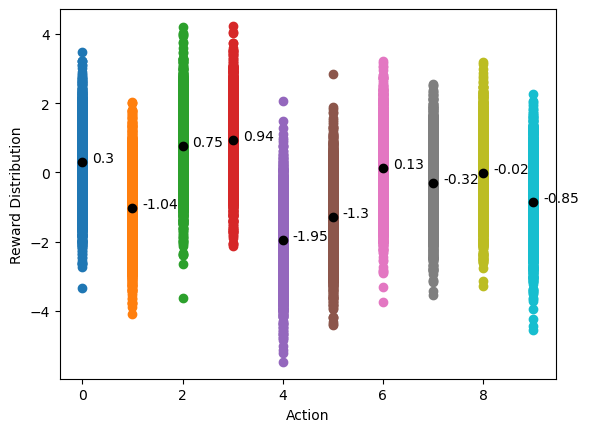

In [4]:
for index in action_indices:
    #np.full fill the value of 1000 array with index value
    plt.scatter(np.full((num_random),index), runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices,true_rewards,'o',color='black')
plt.xlabel("Action")
plt.ylabel("Reward Distribution")
plt.show()

---

In [5]:
def print_progress(index,max_index,max_percent):
    if(index==max_index):
        str_print = "Processing : 100% (Done)"
    else:
        str_print = "Processing : " + str(round((index/max_index)*max_percent,2)) + "%"
    print("\r",str_print,end="")

---

## Greedy vs $\epsilon$-Greedy Method

### Some points regarding our experiments
#### True Reward  for action $a : Q_{\star}(a)$
#### Estimated Reward for action $a$ at time $t : R_t(a)$

#### Reward computed using "sample-average of observed rewards" Method for action $a$ at time $t : Q_t(a)$

1. We produce 2000 different Bandit Problems in which reward corresponding to eachh action is sampled from a normal distribution with mean 0 and variancce 1. These reward is true rewards.
2. During runtime, we don't show the true rewards to our agent. Rather each time an action is selected we sample a reward from normal distribution with mean as true reward (corresponding to that action of that bandit problems) and variance as 1. Now suppose the same action has been previously taken $n-1$ times in the past and sum of those $Sum_{n-1}$. Then reward given to agent will be :
$$\begin{aligned}
Q_t(a) &= \frac{\text{sum of rewards when $a$ taken prior to $t$}}{\text{number of time $a$ taken prior to $t$}} \\
Q_t(a) &= \frac{(Sum_{n-1}+R_t(a))}{n}
\end{aligned}$$

In [41]:
# produce of 2000 different of 10-armed bandit problems
num_bandit = 2000
num_action = 10
num_steps = 1000

rng = np.random.default_rng(seed=42)
# shape is per bandit and per action
shape_ = (num_bandit,num_action)

testbed = rng.normal(0,1,shape_)
#print(testbed)
reward_estimates = np.zeros(shape_)
action_count = np.ones(shape_) # each action is taken at least once
initial_reward_estimates = rng.normal(testbed,1)
print("-----------")
#print(initial_reward_estimates)
print(np.mean(initial_reward_estimates))
print(np.amax(reward_estimates[1]))

-----------
0.008827803199928187
0.0


In [42]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.1
for step in range(2,num_steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(num_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            # maxval to select max value on reward_estimates
            maxval = np.max(reward_estimates[problem_index])

            # get argument action-value maximum with argmax pn reward estimates
            argmaxval = np.ravel(np.array(np.argmax(reward_estimates[problem_index])))
            #argmaxval = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))

            #randomly selected action from 0 to maximum action argmaxval
            random_choice = np.random.choice(argmaxval) # breaking ties randomly
        else :
             random_choice = np.random.randint(num_action)
        
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/num_bandit)
    print_progress(step,num_steps-1,100)

 Processing : 100% (Done)

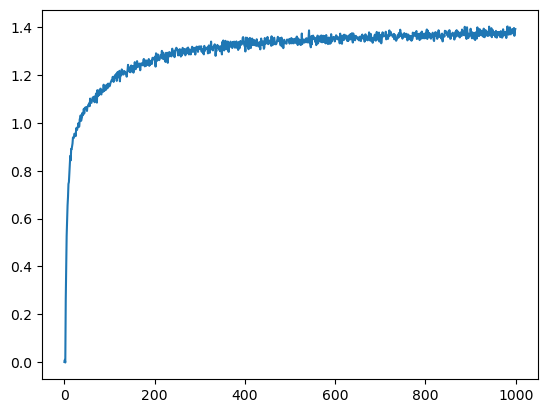

In [43]:
plt.plot(np.arange(num_steps),rewards)